In [4]:
import pandas as pd
import re
from plotnine import *
import plotnine.options

In [7]:
name_to_code = {
    'Basophil': '30160',
    'BMI': '21001',
    'DBP': '4079',
    'Eosinophil': '30150',
    'Hb': '30020',
    'Height': '50',
    'Ht': '30030',
    'Lymphocyte': '30120',
    'MCH': '30050',
    'MCHC': '30060',
    'MCV': '30040',
    'Monocyte': '30130',
    'Neutrophil': '30140',
    'Platelet': '30080',
    'RBC': '30010',
    'SBP': '4080',
    'WBC': '30000',
}
code_to_name = {v: k for k, v in name_to_code.items()}

codes = [(f"{v}-0.0", f"{v}-1.0") for v in name_to_code.values()]
codes = [code for tup in codes for code in tup ]

In [8]:
plot_df = (
    df
    .loc[:, ['eid', *codes]]
    .melt(id_vars='eid')
    .assign(
        trait=lambda df: df['variable'].apply(lambda x: re.search('[0-9]+(?=-)', x).group()),
        visit=lambda df: df['variable'].apply(lambda x: re.search('(?<=-)[0-9]', x).group()),
        trait_name=lambda df: df['trait'].map(code_to_name),
    )
    .pivot_table(index=['eid', 'trait', 'trait_name'], columns='visit', values='value')
    .reset_index()
    .dropna()
)

del df

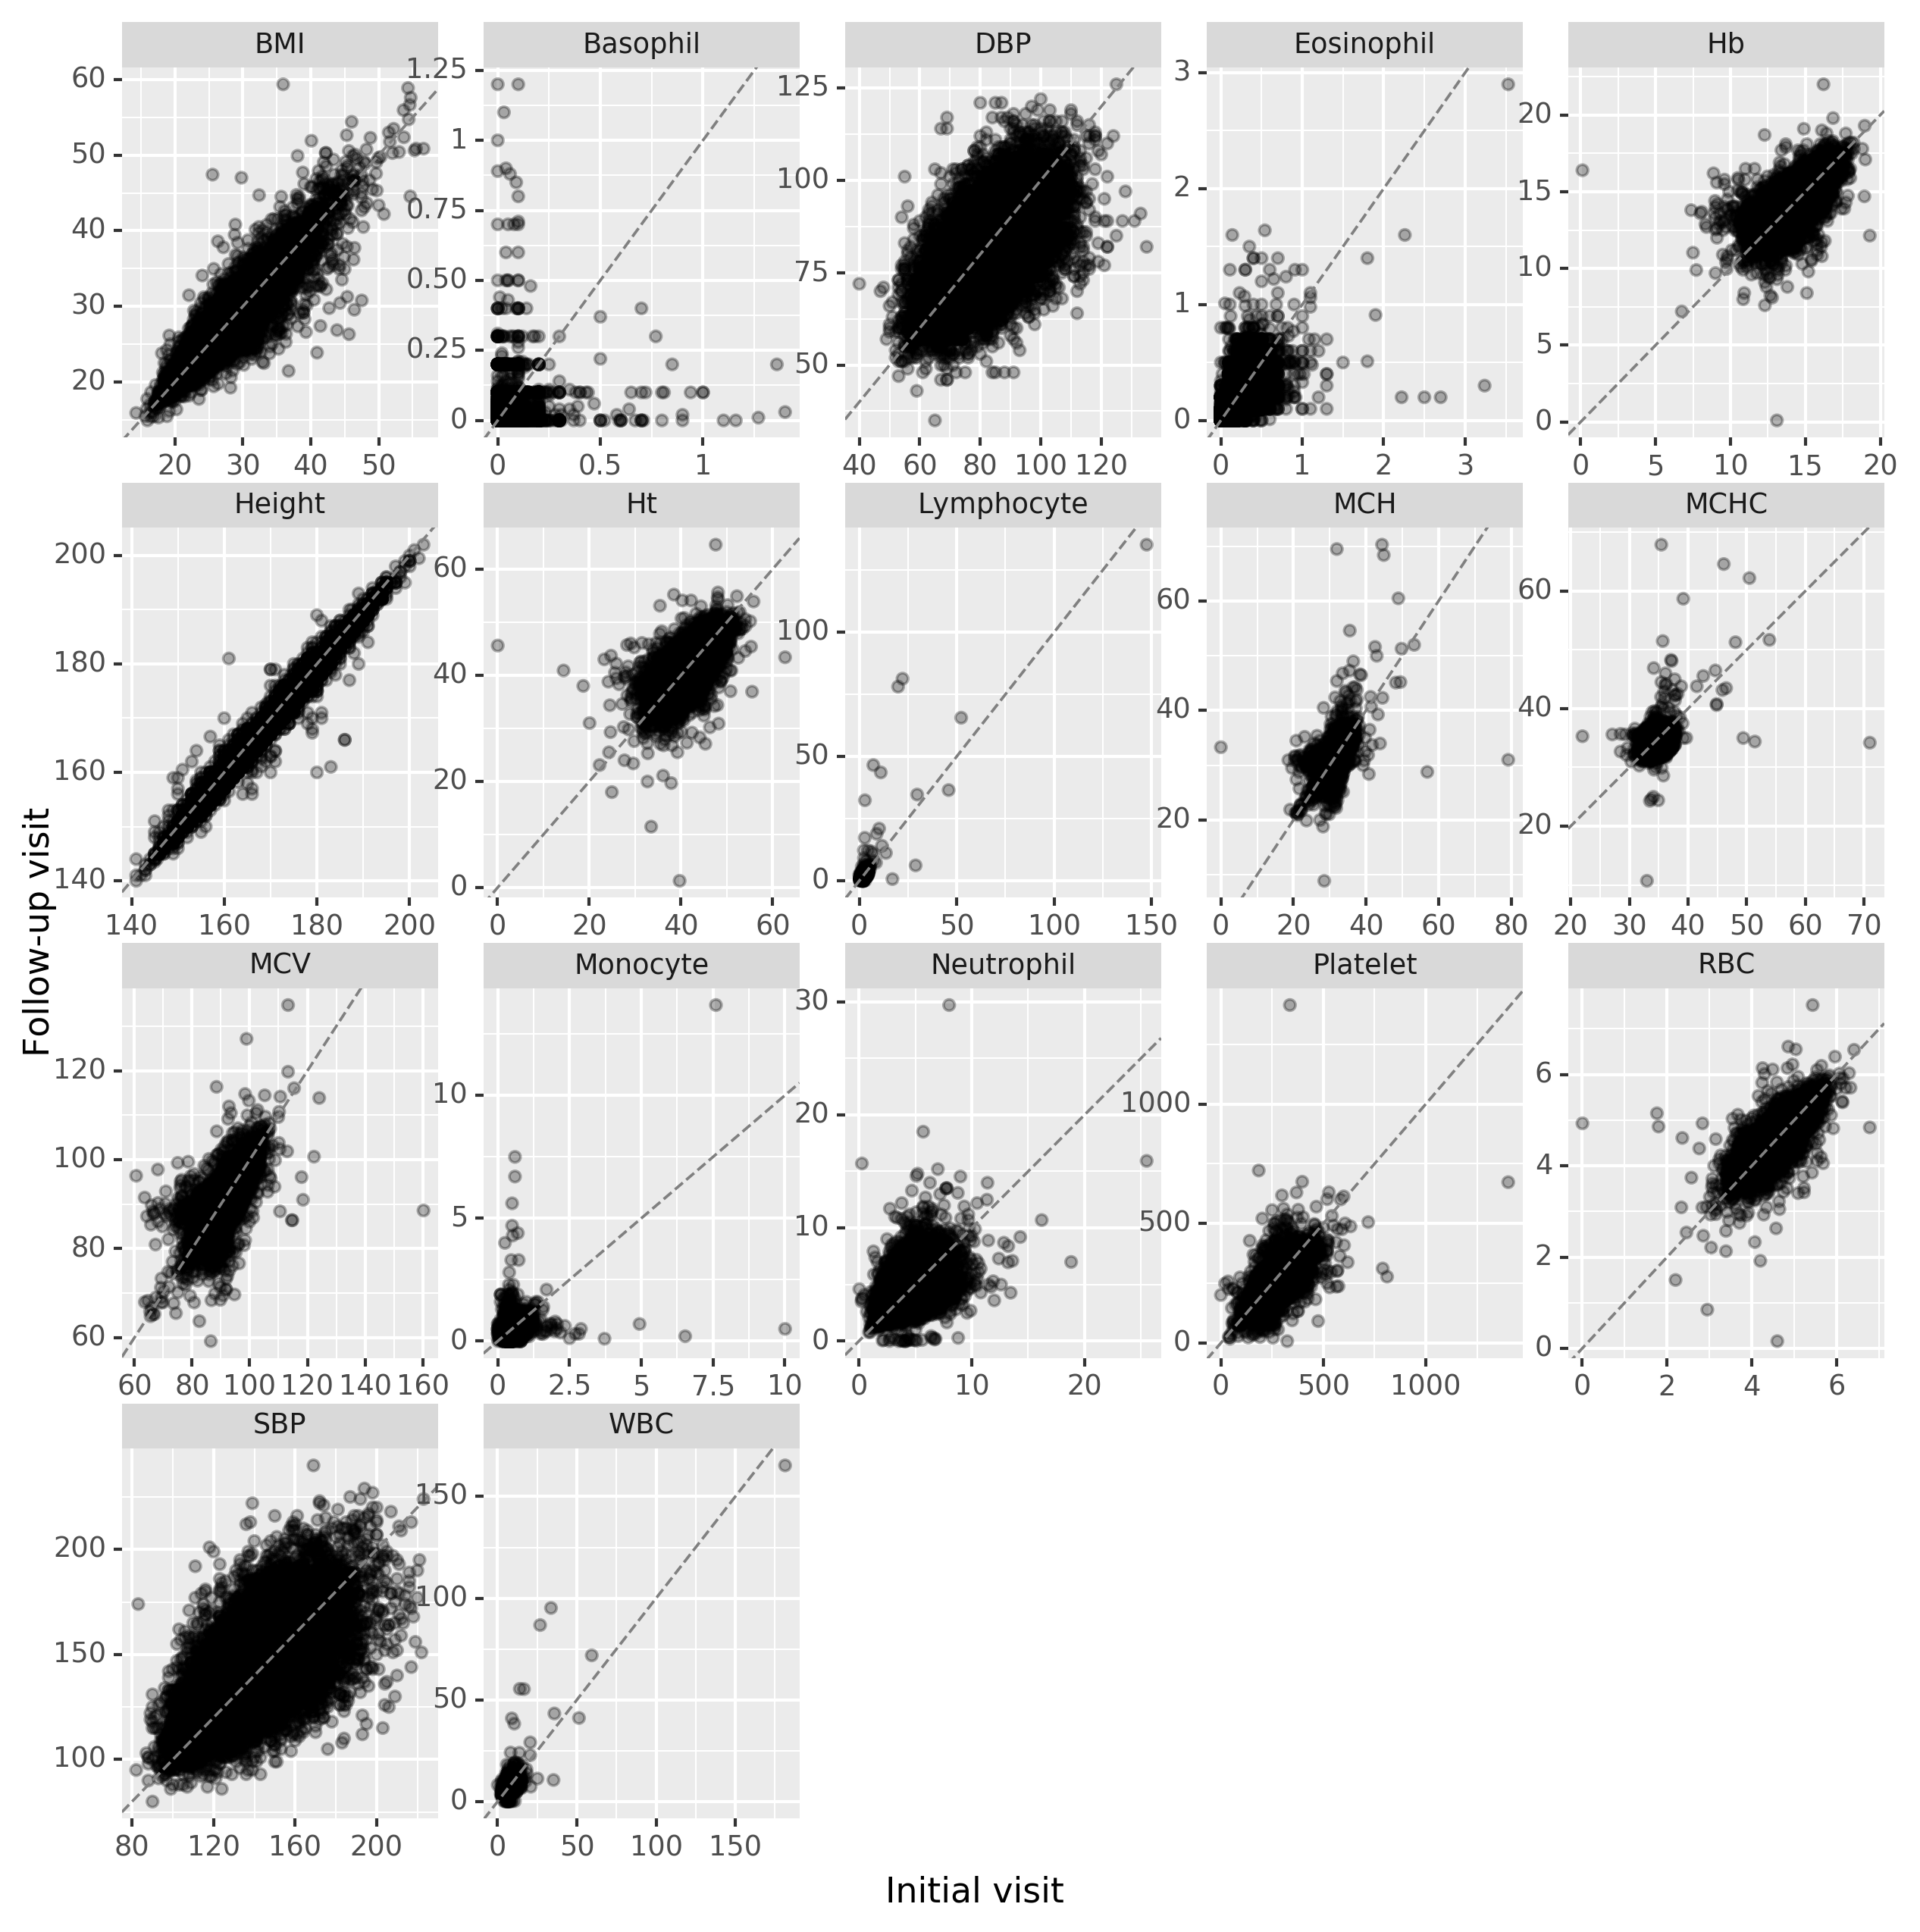

<ggplot: (-9223363263919201059)>

In [14]:
plotnine.options.figure_size = (10, 10)
plotnine.options.dpi = 300

(
    ggplot(plot_df, aes(x = '0', y = '1'))
    + geom_point(alpha = 0.3)
    + geom_abline(slope = 1, intercept = 0, color = 'grey', linetype = 'dashed')
    + facet_wrap('trait_name', scales='free')
    + xlab('Initial visit')
    + ylab('Follow-up visit')
    + theme(panel_spacing = 0.2)
)